Data in `../v2_bifdat_1par` and `../v2_bifdat_2par`.

For each directory, full bifurcation diagram data is in `full`, reduced in `redu`. This file will clean both and focus only on 2 par.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 2)

In [2]:
# get places where data is disjoint
def get_disjoint_idx(dat,dx=.1,dy=.1):
    """
    assume write points data two par (not allpts data) from XPP, no oscillations
    """
    x_idx = np.where(np.abs(np.diff(dat[:,0]))>dx)
    y_idx = np.where(np.abs(np.diff(dat[:,1]))>dy)
    fig,axs = plt.subplots(figsize=(4,2))
    axs.plot(np.diff(dat[:,0]),label='x diff')
    axs.plot(np.diff(dat[:,1]),label='y diff')
    axs.legend()
    plt.show()
    return np.union1d(x_idx[0],y_idx[0])

In [3]:
# get places where data changes direction abruptly
# specifically, where the velocity vector changes rapidly (e.g., flips)
def get_direction_change_idx(dat,dtheta=.1):
    """
    assume write points data two par (not allpts data) from XPP, no oscillations
    """
    velocity = np.diff(dat[:,:2],axis=0)

    # angle of velocity
    theta = np.arctan2(velocity[:,1],velocity[:,0])

    diff = np.mod(np.diff(theta)+np.pi,2*np.pi)-np.pi

    idx = np.where(np.abs(diff)>dtheta)[0]
    
    fig,axs = plt.subplots(figsize=(4,2))
    axs.plot(np.abs(diff),label='theta abs diff')
    axs.axhline(dtheta,ls='--',color='gray',label='treshold')
    # axs.plot(theta,label='theta')
    axs.legend()
    plt.show()
    return idx

In [4]:
# get places where data changes magnitude abruptly
def get_magnitude_change_idx(dat,dx=.1):
    """
    assume write points data two par (not allpts data) from XPP, no oscillations
    """
    pts = np.linalg.norm(np.diff(dat[:,:2],axis=0),axis=1)

    idx = np.where(pts>dx)[0]+1
    
    fig,axs = plt.subplots(figsize=(4,2))
    axs.plot(pts,label='velocity norm')
    axs.legend()
    plt.show()
    return idx

In [5]:
def exclude_small_idx_range(idxs,min_neighbors = 10):
    """
    Remove idx from idxs if neighbors are too close.
    Helpful when there are too many curves with small numbers of points
    """

    idxs_new = []

    if idxs[1]-idxs[0] > min_neighbors:
        idxs_new.append(idxs[0])

    for i in range(1,len(idxs)-1):
        if (idxs[i]-idxs[i-1] > min_neighbors) and (idxs[i+1]-idxs[i] > min_neighbors):
            idxs_new.append(idxs[i])

    if idxs[-1]-idxs[-2] > min_neighbors:
        idxs_new.append(idxs[-1])
    return np.array(idxs_new)
    

In [6]:
def disjoint_curves_list(dat,idxs):
    """
    collect curves. +1 and -1 is to exclude the discontinuous point
    length_threshold: if number of elements in curve is less than length_threshold, discard.
    """
    disjoint_curves = []
    disjoint_curves.append(dat[:idxs[0]-1,:2])
    
    for i in range(1,len(idxs)):
        disjoint_curves.append(dat[idxs[i-1]+1:idxs[i]-1,:2])

    disjoint_curves.append(dat[idxs[-1]+1:,:2])
    return disjoint_curves

In [7]:
def plot_disjoint_curves(disjoint_curves):
    fig,axs = plt.subplots(figsize=(4,2))
    for i in range(len(disjoint_curves)):
        axs.plot(disjoint_curves[i][:,1],disjoint_curves[i][:,0],label=str(i))
    axs.set_xlabel('delta')
    axs.set_ylabel('eps')
    # axs.set_xlim(0,.1)
    # axs.set_ylim(-.02,.02)
    axs.legend()

# Thal1 Full

This section serves as a documentation and template for all other sections.

Load 2 parameter diagram for $\delta<0$ and $\delta>0$ (neg, pos, respectively.)

## 1:1

In [762]:
ratio = '11'
fname = '../v2_bifdat_2par/full/thal1f_'+ratio+'_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 1:1 neg

In [763]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

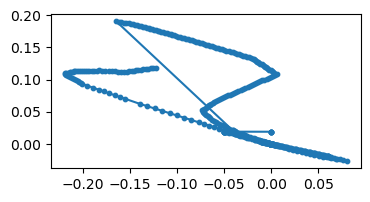

In [764]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [765]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

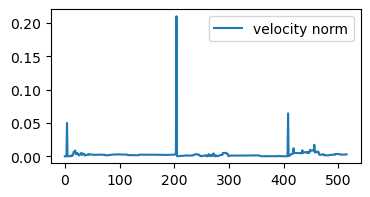

In [766]:
idxs2 = get_magnitude_change_idx(dat,dx=.02)

Get union of large angle and magnitude change.

In [767]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [768]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [769]:
print(idxs)

[  5 205 409]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [770]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

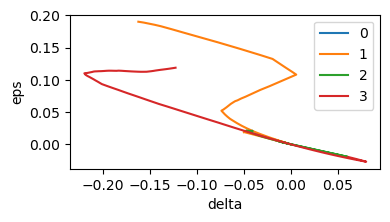

In [771]:
plot_disjoint_curves(disjoint_curves)

keep index 3

In [772]:
curves = np.concatenate([disjoint_curves[3]])

In [773]:
y,x = curves.T
print(x,y)

[ 0.0610313   0.0615357   0.0625455   0.0640507   0.0663256   0.0696968
  0.0730497   0.0766117   0.0801544   0.068597    0.0639798   0.0593839
  0.0548146   0.0502766   0.0457469   0.0412323   0.0367307   0.0322484
  0.0277715   0.023281    0.0187173   0.0142597   0.00972002  0.00566478
  0.00133731 -0.00712836 -0.0126152  -0.0173553  -0.0231808  -0.0287561
 -0.0342568  -0.0397241  -0.0455428  -0.0504057  -0.0552019  -0.0611218
 -0.0657555  -0.0714698  -0.0764142  -0.0851845  -0.0927985  -0.100295
 -0.108075   -0.116001   -0.123868   -0.132077   -0.139956   -0.155404
 -0.160308   -0.166388   -0.172798   -0.178184   -0.183314   -0.189721
 -0.195503   -0.200818   -0.202598   -0.204125   -0.205799   -0.20772
 -0.209416   -0.211477   -0.213707   -0.21623    -0.218097   -0.21884
 -0.219457   -0.217881   -0.216348   -0.215054   -0.213746   -0.212408
 -0.211045   -0.209853   -0.208236   -0.206141   -0.204114   -0.201866
 -0.199796   -0.19774    -0.195693   -0.193438   -0.190801   -0.187982
 

Plot to double check before saving

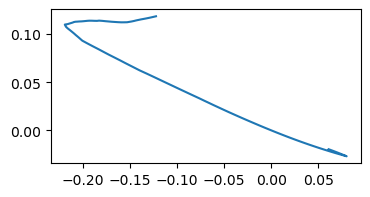

In [774]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [775]:
np.savetxt(fname_new,curves)

### 1:1 pos

In [776]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

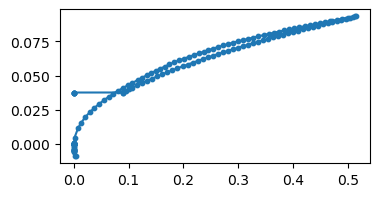

In [777]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

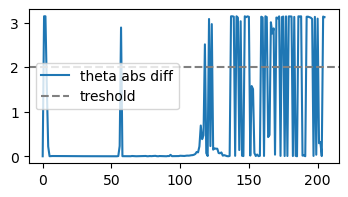

In [778]:
idxs1 = get_direction_change_idx(dat,dtheta=2)

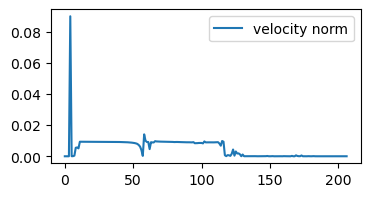

In [779]:
idxs2 = get_magnitude_change_idx(dat,dx=.01)

Get union of large angle and magnitude change.

In [780]:
idxs = np.union1d(idxs2,idxs2)
print(idxs)

[ 5 59]


Exclude curves with small  numbers of points (these are usually false starts)

In [781]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [782]:
print(idxs)

[ 5 59]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [783]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

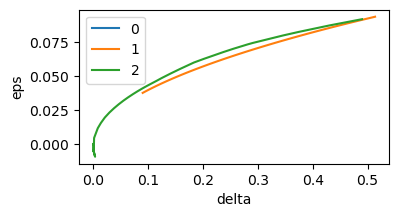

In [784]:
plot_disjoint_curves(disjoint_curves)

save 2

In [785]:
curves = np.concatenate([disjoint_curves[2]])

In [786]:
y,x = curves.T

Plot to double check before saving

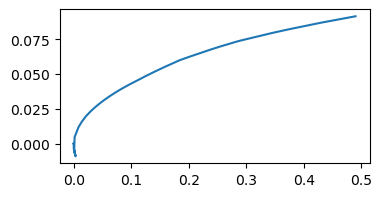

In [787]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [788]:
np.savetxt(fname_new,curves)

## 2:1

### 2:1 neg

In [789]:
ratio = '21'
fname = '../v2_bifdat_2par/full/thal1f_'+ratio+'_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_pos = np.loadtxt(fname.format('pos'))

In [790]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

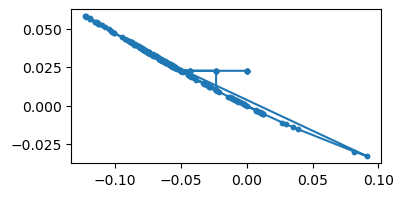

In [791]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

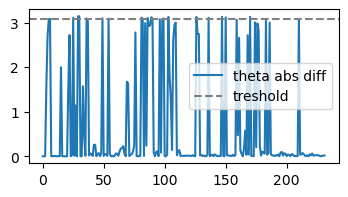

In [868]:
idxs1 = get_direction_change_idx(dat,dtheta=3.09)

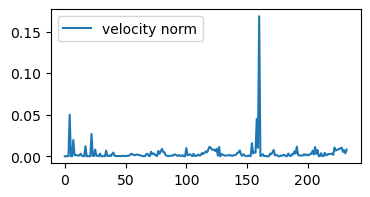

In [869]:
idxs2 = get_magnitude_change_idx(dat,dx=.05)

Get union of large angle and magnitude change.

In [870]:
idxs = np.union1d(idxs1,idxs2)

Exclude curves with small  numbers of points (these are usually false starts)

In [871]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [872]:
print(idxs)

[ 25  29  30  36  49  81  86  89  99 103 126 136 147 150 161 170]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [873]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

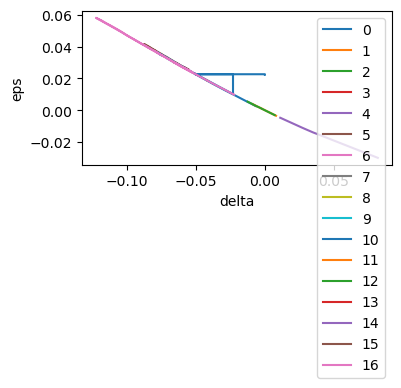

In [874]:
plot_disjoint_curves(disjoint_curves)

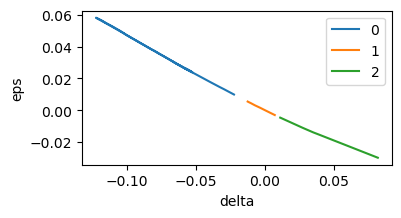

In [881]:
plot_disjoint_curves([disjoint_curves[16],disjoint_curves[12],disjoint_curves[14]])

In [882]:
curves = np.concatenate([disjoint_curves[16],disjoint_curves[12],disjoint_curves[14]])

In [883]:
y,x = curves.T

Plot to double check before saving

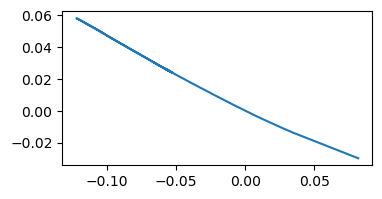

In [884]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [885]:
np.savetxt(fname_new,curves)

### 2:1 pos

In [886]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

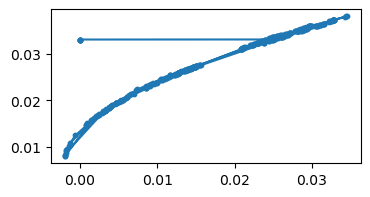

In [887]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

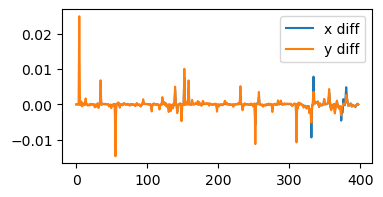

In [230]:
idxs1 = get_disjoint_idx(dat,dy=10,dx=.005)

Get union of large angle and magnitude change.

In [232]:
idxs = idxs1

Exclude curves with small  numbers of points (these are usually false starts)

In [233]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [234]:
print(idxs)

[ 55 152 252 310 331 334]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [235]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

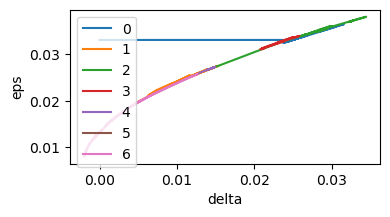

In [236]:
plot_disjoint_curves(disjoint_curves)

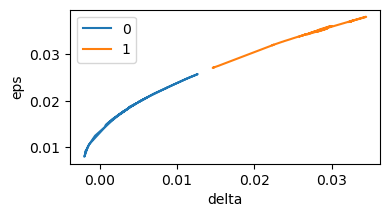

In [240]:
plot_disjoint_curves([disjoint_curves[6],disjoint_curves[2]])

keep indices 0, 20

In [245]:
curves = np.concatenate([disjoint_curves[6][::-1],disjoint_curves[2]])

In [246]:
y,x = curves.T

Plot to double check before saving

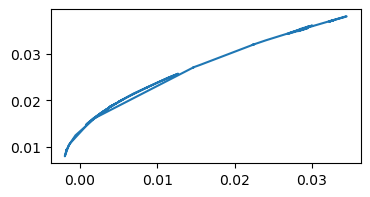

In [247]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [248]:
np.savetxt(fname_new,curves)

## 1:2

### 1:2 neg

In [454]:
ratio = '12'
fname = '../v2_bifdat_2par/full/thal1f_'+ratio+'_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))  # use same data
thal1f_pos = np.loadtxt(fname.format('neg'))

In [455]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

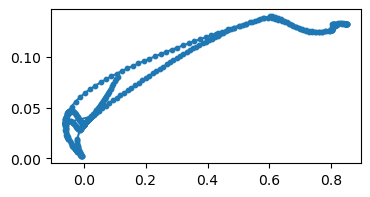

In [456]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

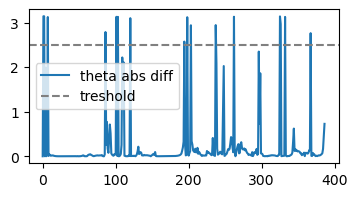

In [457]:
idxs1 = get_direction_change_idx(dat,dtheta=2.5)

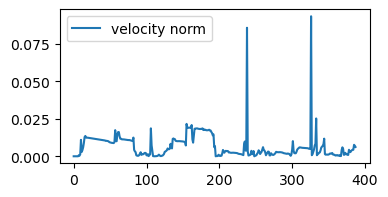

In [458]:
idxs2 = get_magnitude_change_idx(dat,dx=.05)

Get union of large angle and magnitude change.

In [459]:
idxs = np.union1d(idxs1,idxs2)

Exclude curves with small  numbers of points (these are usually false starts)

In [460]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [461]:
print(idxs)

[  1   2   7  86 101 103 120 194 198 203 237 239 262 325 326 327 332 367]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [462]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

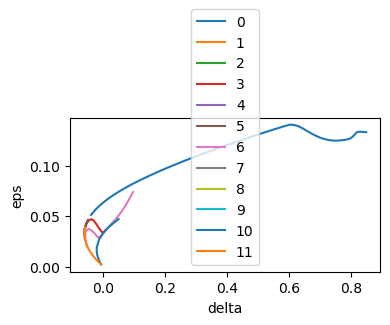

In [463]:
plot_disjoint_curves(disjoint_curves[7:])

Keep curve indices 4,5

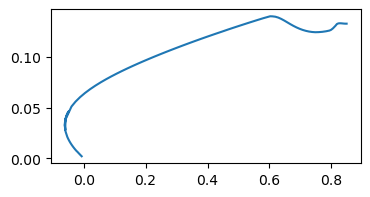

In [464]:
curves = np.concatenate([disjoint_curves[7],disjoint_curves[12],disjoint_curves[18][::-1]])
y,x = curves.T
fig,axs = plt.subplots()
axs.plot(x,y)

In [465]:
np.savetxt(fname_new,curves)

### 1:2 pos

In [466]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

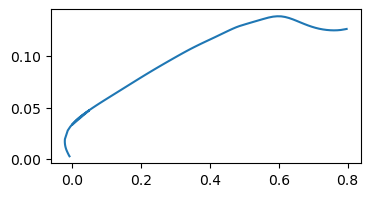

In [467]:
curves = np.concatenate([disjoint_curves[3][::-1],disjoint_curves[17]])
y,x = curves.T
fig,axs = plt.subplots()
axs.plot(x,y)

In [468]:
np.savetxt(fname_new,curves)

## 2:3

### 2:3 neg

In [469]:
ratio = '23'
fname = '../v2_bifdat_2par/full/thal1f_'+ratio+'_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_pos = np.loadtxt(fname.format('pos'))

In [470]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

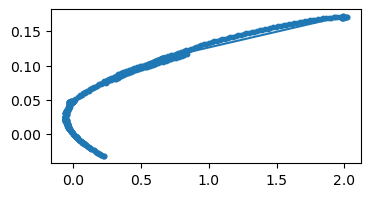

In [471]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

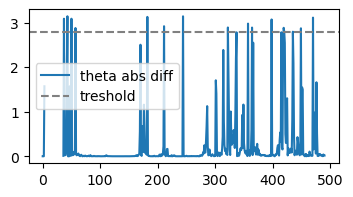

In [573]:
idxs1 = get_direction_change_idx(dat,dtheta=2.8)

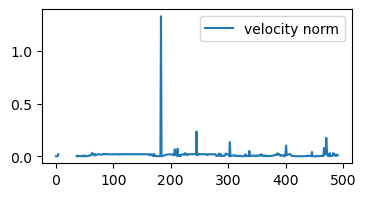

In [574]:
idxs2 = get_magnitude_change_idx(dat,dx=.5)

Get union of large angle and magnitude change.

In [575]:
idxs = np.union1d(idxs1,idxs2)

Exclude curves with small  numbers of points (these are usually false starts)

In [576]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [577]:
print(idxs)

[ 37  43  50  57 182 184 211 244 322 357 364 398 419 449 470]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [578]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

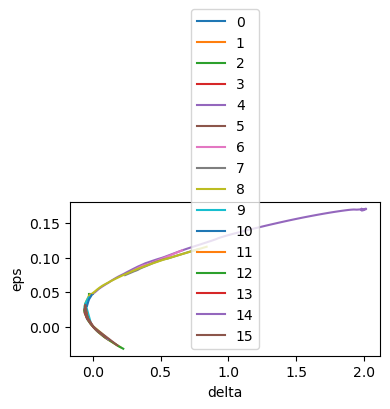

In [579]:
plot_disjoint_curves(disjoint_curves)

Keep curve indices 4,5

In [580]:
curves = np.concatenate([disjoint_curves[8]])

In [581]:
y,x = curves.T

Plot to double check before saving

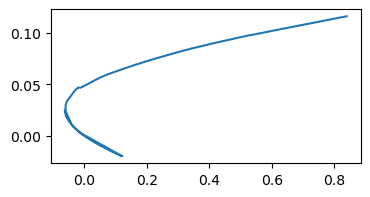

In [582]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [583]:
np.savetxt(fname_new,curves)

### 2:3 pos

In [584]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

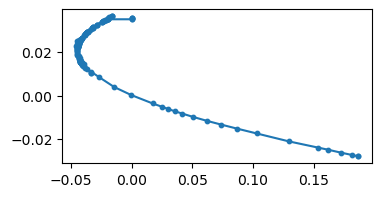

In [585]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

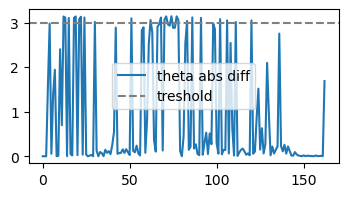

In [589]:
idxs1 = get_direction_change_idx(dat,dtheta=3)

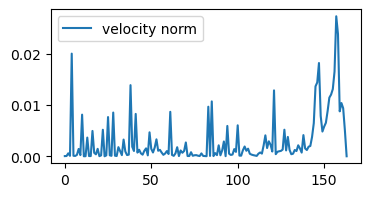

In [597]:
idxs2 = get_magnitude_change_idx(dat,dx=.015)

Get union of large angle and magnitude change.

In [598]:
idxs = np.union1d(idxs2,idxs2)

Exclude curves with small  numbers of points (these are usually false starts)

In [599]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [600]:
print(idxs)

[  5 148 157 158 159]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [601]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

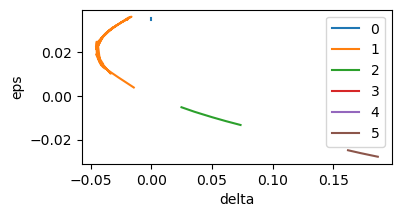

In [602]:
plot_disjoint_curves(disjoint_curves)

In [616]:
curves = np.concatenate([disjoint_curves[5][::-1],disjoint_curves[2][::-1],disjoint_curves[1][::-1]])

In [617]:
y,x = curves.T

Plot to double check before saving

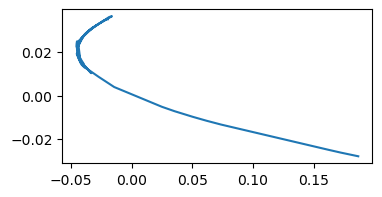

In [618]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [619]:
np.savetxt(fname_new,curves)

# Thal1 Reduced

## 1:1

In [48]:
ratio = '11'
fname = '../v2_bifdat_2par/redu/thal1f_'+ratio+'_o2_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 1:1 neg

In [49]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

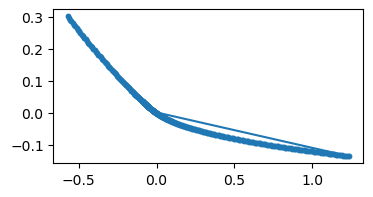

In [50]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [51]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

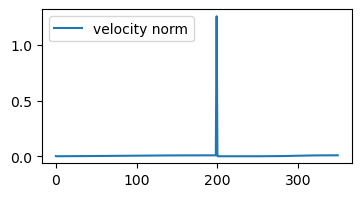

In [52]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [53]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [54]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [55]:
print(idxs)

[200]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [56]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

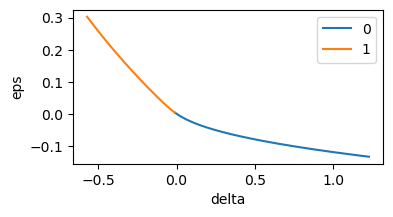

In [57]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to keep curves 1 and 2.

Create a new empty array, concatenate curves 1 and 2 in a consistent order, save to file.

In [58]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [59]:
y,x = curves.T

Plot to double check before saving

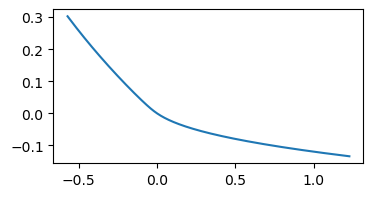

In [60]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [61]:
np.savetxt(fname_new,curves)

### 1:1 pos

In [62]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

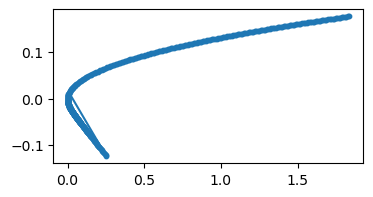

In [63]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

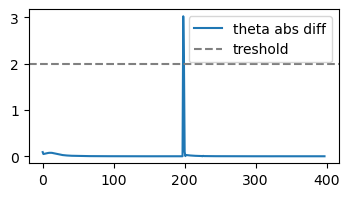

In [64]:
idxs1 = get_direction_change_idx(dat,dtheta=2)

In [65]:
print(idxs1)

[198 199]


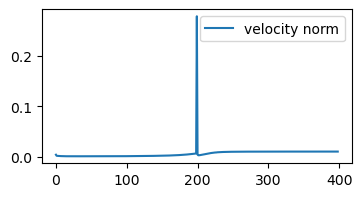

In [66]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [67]:
print(idxs2)

[200]


Get union of large angle and magnitude change.

In [68]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [69]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [70]:
print(idxs)

[200]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [71]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

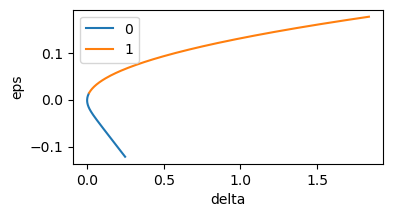

In [72]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to exclude curve index 2

In [73]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1]])

In [74]:
y,x = curves.T

Plot to double check before saving

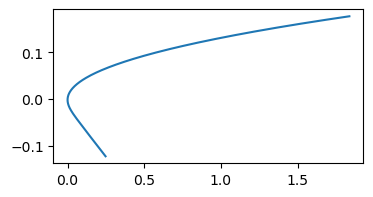

In [75]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [76]:
np.savetxt(fname_new,curves)

## 2:1

### 2:1 neg

In [249]:
ratio = '21'
fname = '../v2_bifdat_2par/redu/thal1f_'+ratio+'_o2_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_pos = np.loadtxt(fname.format('pos'))

In [250]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

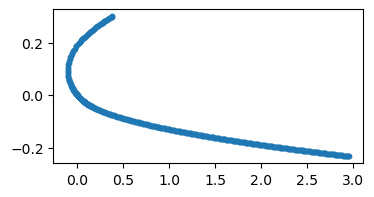

In [251]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [252]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

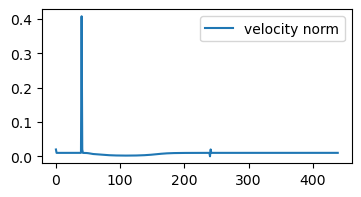

In [253]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [254]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [255]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [256]:
print(idxs)

[41]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [257]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

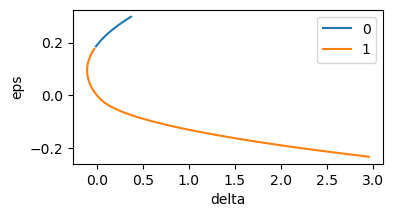

In [258]:
plot_disjoint_curves(disjoint_curves)

Keep curve indices 4,5

In [259]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [260]:
y,x = curves.T

Plot to double check before saving

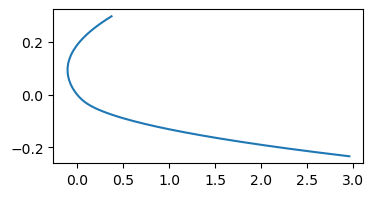

In [261]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [262]:
np.savetxt(fname_new,curves)

### 2:1 pos

In [263]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

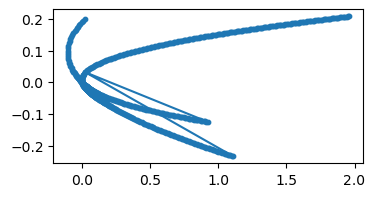

In [264]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

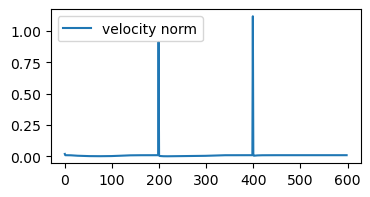

In [265]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [266]:
idxs = idxs2

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [267]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

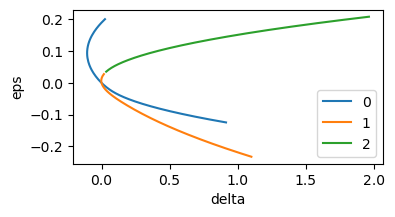

In [268]:
plot_disjoint_curves(disjoint_curves)

In [272]:
curves = np.concatenate([disjoint_curves[1][::-1],disjoint_curves[2]])

In [273]:
y,x = curves.T

Plot to double check before saving

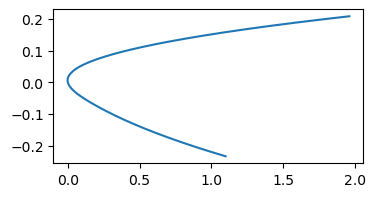

In [274]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [275]:
np.savetxt(fname_new,curves)

## 1:2

In [389]:
ratio = '12'
fname = '../v2_bifdat_2par/redu/thal1f_'+ratio+'_o2_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 1:2 neg

In [390]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

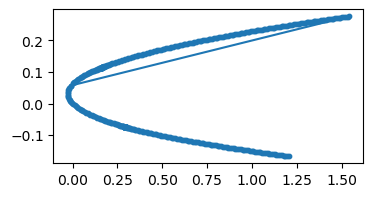

In [391]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [392]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

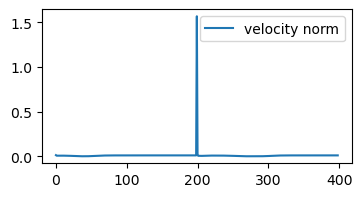

In [393]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [394]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [395]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [396]:
print(idxs)

[200]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [397]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

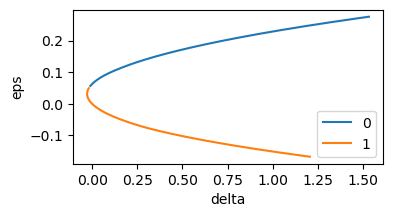

In [398]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to keep curves 1 and 2.

Create a new empty array, concatenate curves 1 and 2 in a consistent order, save to file.

In [399]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [400]:
y,x = curves.T

Plot to double check before saving

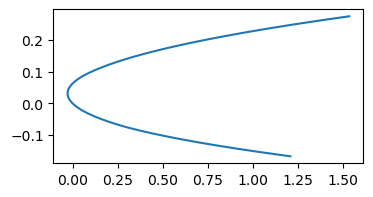

In [401]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [402]:
np.savetxt(fname_new,curves)

### 1:2 pos

In [403]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

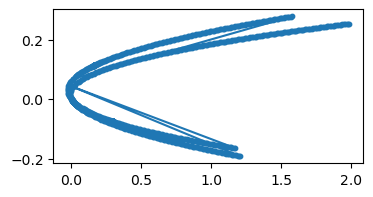

In [404]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

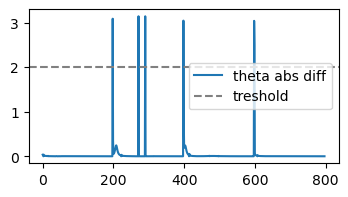

In [405]:
idxs1 = get_direction_change_idx(dat,dtheta=2)

In [406]:
print(idxs1)

[198 271 290 398 598 599]


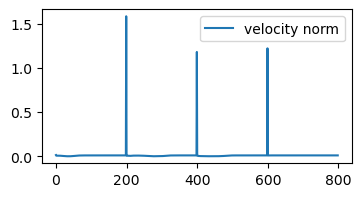

In [407]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [408]:
print(idxs2)

[200 400 600]


Get union of large angle and magnitude change.

In [409]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [410]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [411]:
print(idxs)

[200 400 600]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [412]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

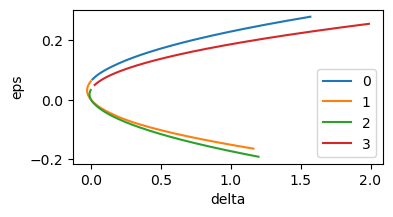

In [413]:
plot_disjoint_curves(disjoint_curves)

In [414]:
curves = np.concatenate([disjoint_curves[2][::-1],disjoint_curves[3]])

In [415]:
y,x = curves.T

Plot to double check before saving

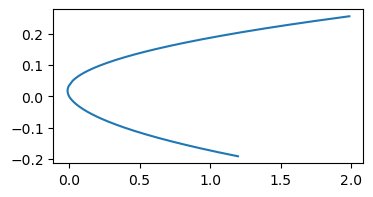

In [416]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [417]:
np.savetxt(fname_new,curves)

## 1:2 o1

In [684]:
ratio = '12'
fname = '../v2_bifdat_2par/redu/thal1f_'+ratio+'_o1_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 1:2 neg

In [685]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

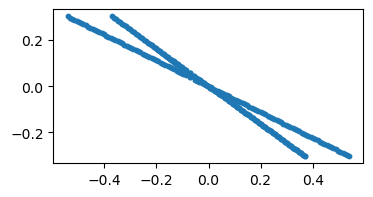

In [686]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [687]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

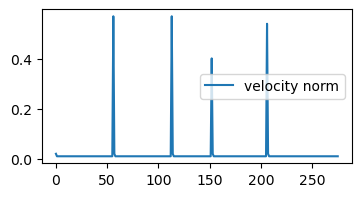

In [688]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [689]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [690]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [691]:
print(idxs)

[ 57 114 153 207]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [692]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

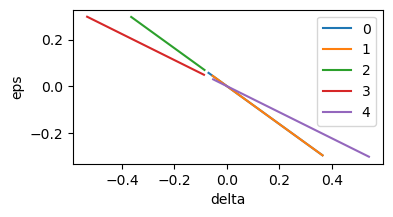

In [693]:
plot_disjoint_curves(disjoint_curves)

2, 1

In [698]:
curves = np.concatenate([disjoint_curves[3][::-1,:],disjoint_curves[4]])

In [699]:
y,x = curves.T

Plot to double check before saving

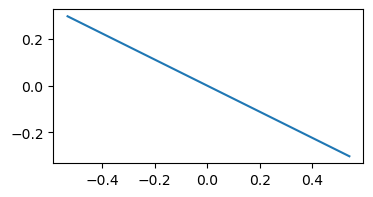

In [700]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [701]:
np.savetxt(fname_new,curves)

### 1:2 pos

In [669]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

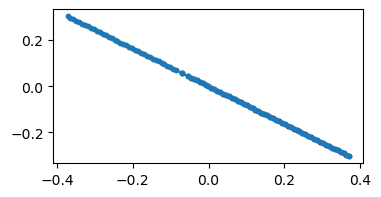

In [670]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

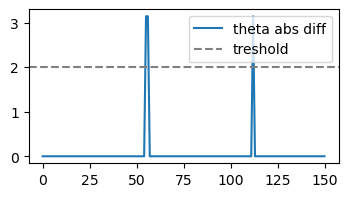

In [671]:
idxs1 = get_direction_change_idx(dat,dtheta=2)

In [672]:
print(idxs1)

[ 55  56 112]


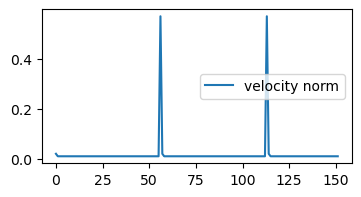

In [673]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [674]:
print(idxs2)

[ 57 114]


Get union of large angle and magnitude change.

In [675]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [676]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [677]:
print(idxs)

[ 57 114]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [678]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

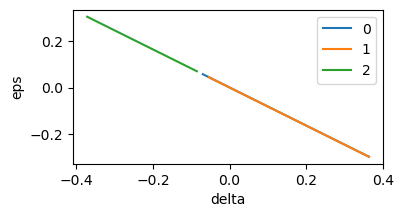

In [679]:
plot_disjoint_curves(disjoint_curves)

In [680]:
curves = np.concatenate([disjoint_curves[2],disjoint_curves[1]])

In [681]:
y,x = curves.T

Plot to double check before saving

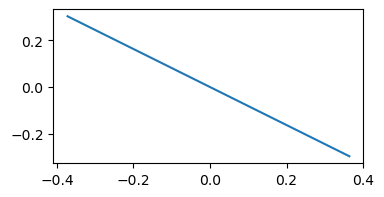

In [682]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [683]:
np.savetxt(fname_new,curves)

## 2:3

In [620]:
ratio = '23'
fname = '../v2_bifdat_2par/redu/thal1f_'+ratio+'_o2_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 2:3 neg

In [621]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

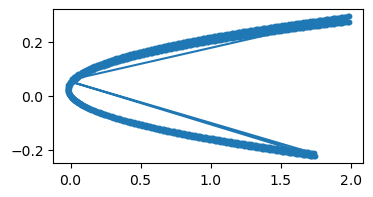

In [622]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [623]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

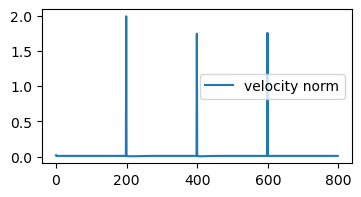

In [624]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [625]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [626]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [627]:
print(idxs)

[200 400 600]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [628]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

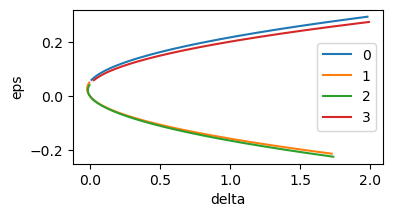

In [629]:
plot_disjoint_curves(disjoint_curves)

In [630]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[2]])

In [631]:
y,x = curves.T

Plot to double check before saving

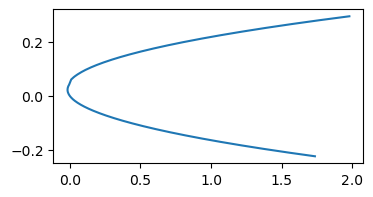

In [632]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [633]:
np.savetxt(fname_new,curves)

### 2:3 pos

In [634]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

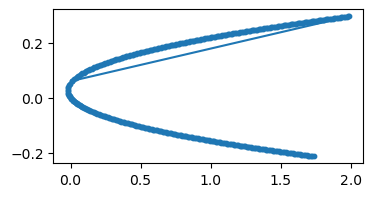

In [635]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

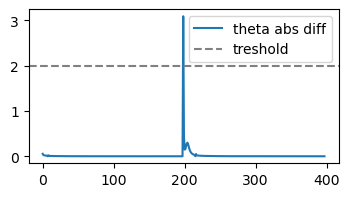

In [636]:
idxs1 = get_direction_change_idx(dat,dtheta=2)

In [637]:
print(idxs1)

[198]


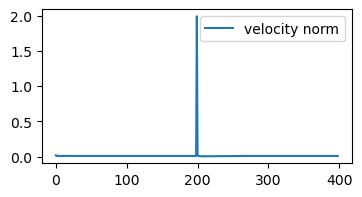

In [638]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [639]:
print(idxs2)

[200]


Get union of large angle and magnitude change.

In [640]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [641]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [642]:
print(idxs)

[200]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [643]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

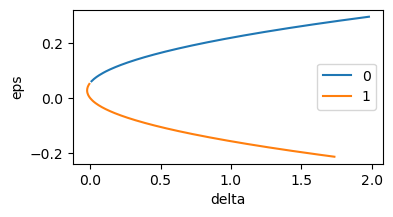

In [644]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to exclude curve index 2

In [645]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1]])

In [646]:
y,x = curves.T

Plot to double check before saving

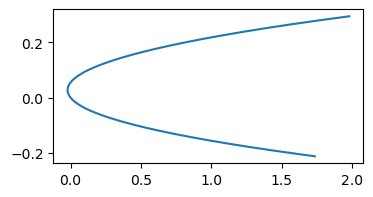

In [647]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [648]:
np.savetxt(fname_new,curves)

## 2:3 o1

In [733]:
ratio = '23'
fname = '../v2_bifdat_2par/redu/thal1f_'+ratio+'_o1_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 2:3 neg

In [734]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

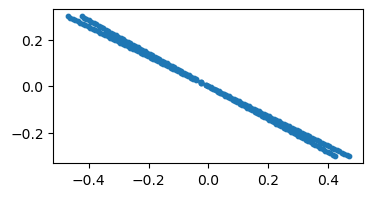

In [735]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [736]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

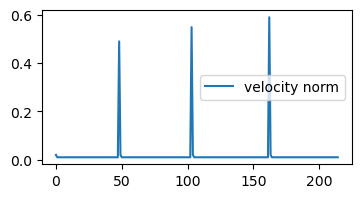

In [737]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [738]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [739]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [740]:
print(idxs)

[ 49 104 163]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [741]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

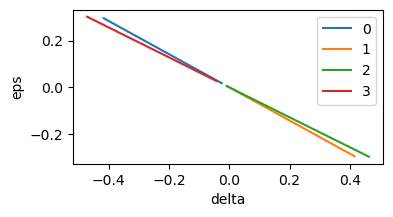

In [742]:
plot_disjoint_curves(disjoint_curves)

In [743]:
curves = np.concatenate([disjoint_curves[2][::-1,:],disjoint_curves[3]])

In [744]:
y,x = curves.T

Plot to double check before saving

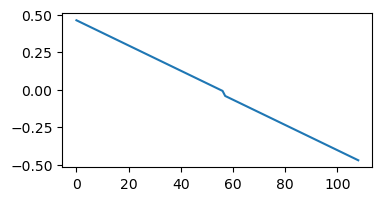

In [745]:
fig,axs = plt.subplots()
axs.plot(x)

In [746]:
np.savetxt(fname_new,curves)

### 2:3 pos

In [747]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

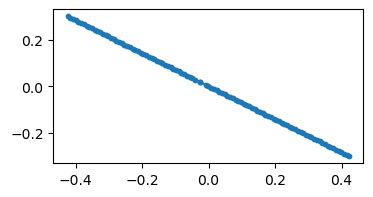

In [748]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

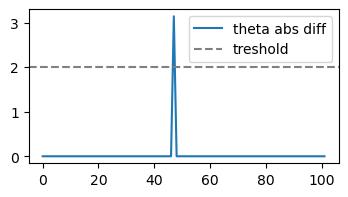

In [749]:
idxs1 = get_direction_change_idx(dat,dtheta=2)

In [750]:
print(idxs1)

[47]


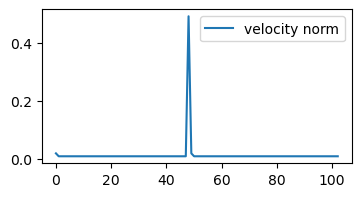

In [751]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [752]:
print(idxs2)

[49]


Get union of large angle and magnitude change.

In [753]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [754]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [755]:
print(idxs)

[49]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [756]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

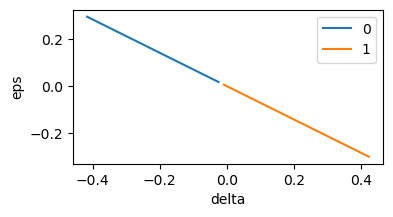

In [757]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to exclude curve index 2

In [758]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1]])

In [759]:
y,x = curves.T

Plot to double check before saving

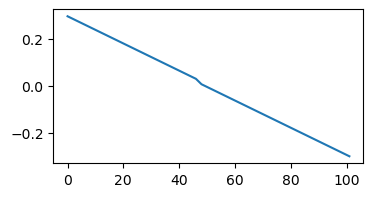

In [760]:
fig,axs = plt.subplots()
axs.plot(y)

In [761]:
np.savetxt(fname_new,curves)